# LogisticRegression - Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)


(500, 2)
(500, 2)


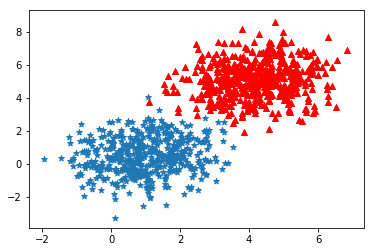

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,1],marker ='*' )
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'red',marker = '^')
plt.show()

## Create Training and Test Set

In [4]:
data = np.zeros((1000,3))
data[:500,:2] =dist_01
data[500:, :2] = dist_02
data[500:, -1] = 1.0
print(data)

[[ 2.56472195 -0.06621003  0.        ]
 [ 1.65820031  2.19641894  0.        ]
 [ 0.54775168  0.27071355  0.        ]
 ...
 [ 4.23719707  4.77053888  1.        ]
 [ 3.480823    4.05464453  1.        ]
 [ 5.42888011  6.8230581   1.        ]]


In [5]:
np.random.shuffle(data)
print(data)

[[ 0.29997012  0.33614365  0.        ]
 [ 3.41859548  3.9767693   1.        ]
 [ 1.14609303 -1.36052934  0.        ]
 ...
 [ 3.82866362  5.71143346  1.        ]
 [ 3.2340808   5.87482199  1.        ]
 [ 4.07184205  5.95165584  1.        ]]


In [6]:
split = int(0.8*data.shape[0])
print(split)

800


In [7]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


# Logistic Regression - Implementation

In [8]:
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)



def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))



def error(y_true,x,w,b):
    m = x.shape[0]
    err=0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    return -err/m



def get_grads(y_true,x,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i] - hx)
        
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]

def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b

def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return float((y_pred == y_tst).sum())/y_tst.shape[0]


In [9]:
loss =[]
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

#print(X_train.shape[1])
print(W.shape)
print(b)

(2,)
1.5570177236416427


In [10]:
for i in range(800):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

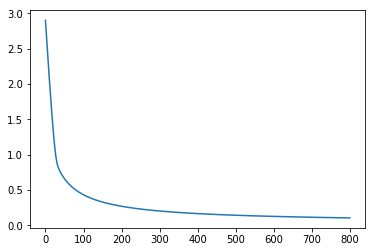

In [11]:
#print(loss)
plt.plot(loss)
plt.show()

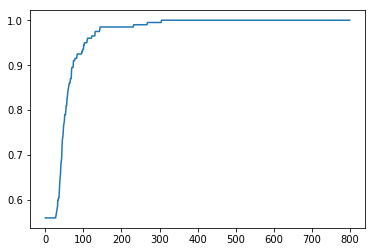

1.0


In [13]:
plt.plot(acc)
plt.show()
print(acc[-1])

# Logistic Regression - Visualizing Decision Boundary

No handles with labels found to put in legend.


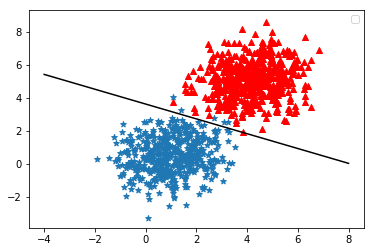

In [15]:
plt.scatter(dist_01[:,0],dist_01[:,1],marker ='*' )
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'red',marker = '^')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()
